## Downloading the data

Data downloaded from [The Committee to Protect Journalists](https://cpj.org/about/).

[Link](https://cpj.org/data/killed/) to the data.

## Loading the data

In [37]:
import pandas as pd
import numpy as np
import os
import pycountry
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print('RequiredLibraries imported.')

RequiredLibraries imported.


In [ ]:
os.getcwd()

In [32]:
file_path = 'Journalists and Media Workers killed since 1992.csv'

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,1993,Unconfirmed,Zivko Filipovic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,2022,Confirmed,Zoreslav Zamoysky,NaN,Ukraine,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2198,2007,Confirmed,Zubair Ahmed Mujahid,NaN,Pakistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,2014,Confirmed,Zubair Hatami,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One look at the data and we can see that there is so much missing data and potentially other issues to deal with before we can start working with the data.

Here is a list potential list of To-Do procedures that might be useful in the preparation of the data.

1. Data Cleaning:

    - Remove unnecessary columns that are not relevant to your analysis.
    - Check for duplicate records and remove them if necessary.
    - Identify and handle missing values by either imputing them or removing the corresponding rows/columns, depending on the context and impact on the analysis.
    - Handle inconsistent or erroneous data entries by performing data validation checks and correcting or removing the problematic entries.
    - Standardize and clean up text data, such as removing leading/trailing spaces, converting to consistent case (e.g., lowercase), and correcting misspellings.

2. Data Validation:

    - Check data types of each column and ensure they are assigned correctly. Convert data types if necessary.
    - Validate the range and boundaries of numeric data to identify outliers or extreme values that may need further investigation or handling.
    - Verify the consistency and correctness of categorical variables, such as checking for valid values and identifying potential discrepancies or inconsistencies.

3. Data Transformation:

    - Reshape the data if needed, such as pivoting, melting, or splitting columns to align with the desired analysis or modeling requirements.
    - Perform feature engineering, which involves creating new meaningful variables based on existing data, such as deriving age from a birthdate column or calculating ratios from existing numerical columns.

4. Identify other potential issues.

5. Apply appropriate fixes and improvements.

The example list is not exhaustive, but it is a good place to start.

## Basic Exploration of the data

In [ ]:
#Questions
#1. How big is the dataset? How mant rows? How many columns?
#3. What are the data types of the columns? 
#4. Are there any missing values?
#5. Are there any duplicates?
#6. Do we need all the columns?

In [97]:
no_miss = df.dropna(how='all')
no_miss

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2006,Confirmed,Ahmad [full name unavailable],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,Confirmed,Khaled Mohammad Nofan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Confirmed,Sabah Salman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,Confirmed,Unidentified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Confirmed,Abadullah Hananzai,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,1993,Unconfirmed,Zivko Filipovic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,2022,Confirmed,Zoreslav Zamoysky,NaN,Ukraine,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2198,2007,Confirmed,Zubair Ahmed Mujahid,NaN,Pakistan,NaN,NaN,Male,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,2014,Confirmed,Zubair Hatami,NaN,Afghanistan,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


X-RAY of missing values


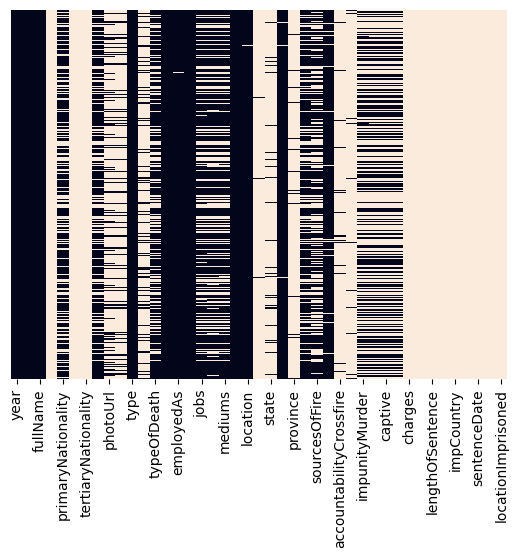

In [87]:
#heatmap of missing values
print('X-RAY of missing values')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [92]:
header = ['columns', 'values', 'missing n', 'missing %']

missing = list(df.isnull().sum())
per = list((df.isnull().mean() * 100).round(2))
count = list(df.count().values)
sample = list(df.sample(n=1, random_state=98).copy().iloc[0])

info_frame=pd.DataFrame(columns=header)

info_frame['columns'] = df.columns
info_frame['values'] = count
info_frame['missing n'] = missing
info_frame['missing %'] = per

info_frame['sample'] = sample

print('Table shape:', df.shape[0], 'rows and', df.shape[1], 'columns\n')

del header, missing, per, count, sample, #info_frame

info_frame



Table shape: 2201 rows and 43 columns



,columns,values,missing n,missing %,sample
0,year,2201,0,0.00,2010
1,combinedStatus,2201,0,0.00,Confirmed
2,fullName,2201,0,0.00,Aleh Byabenin
3,sortName,0,2201,100.00,NaN
4,primaryNationality,1487,714,32.44,Belarus
5,secondaryNationality,8,2193,99.64,NaN
6,tertiaryNationality,0,2201,100.00,NaN
7,gender,1620,581,26.40,Male
8,photoUrl,547,1654,75.15,https://cpj-photos.s3-us-west-2.amazonaws.com/...
9,photoCredit,388,1813,82.37,Reuters
